## Exploratory Data Analysis (EDA) for Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np

## Import Data 

In [14]:
df = pd.read_csv('space_missions1.csv')


df.head(10)

,Company,Location,Year,Time,Rocket,MissionStatus,RocketStatus,Price,Mission
0,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1997,NaN,VLS-1,0,Retired,NaN,SCD-2A
1,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",1999,1899-12-30 19:40:00,VLS-1,0,Retired,NaN,SACI-2
2,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...",2003,NaN,VLS-1,0,Retired,NaN,"SATEC, UNOSAT"
3,AMBA,"LA-5B, RAAF Woomera Range Complex, Australia",1967,NaN,Redstone Sparta,1,Retired,NaN,WRESAT
4,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:48:00,Juno I,1,Retired,NaN,Explorer 1
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 18:27:00,Juno I,0,Retired,NaN,Explorer 2
6,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 03:21:00,Juno I,0,Retired,NaN,Beacon 1
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 05:44:00,Juno II,0,Retired,NaN,Pioneer 3
8,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 06:17:00,Juno I,0,Retired,NaN,Explorer 5
9,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958,1899-12-30 15:00:00,Juno I,1,Retired,NaN,Explorer 4


In [15]:
df.info

<bound method DataFrame.info of        Company                                           Location  Year  \
0          AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  1997   
1          AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  1999   
2          AEB  VLS Pad, Alcântara Launch Center, Maranhão, Br...  2003   
3         AMBA       LA-5B, RAAF Woomera Range Complex, Australia  1967   
4         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA  1958   
...        ...                                                ...   ...   
4621    VKS RF        Site 90/20, Baikonur Cosmodrome, Kazakhstan  2001   
4622    VKS RF        Site 90/20, Baikonur Cosmodrome, Kazakhstan  2004   
4623    VKS RF        Site 90/20, Baikonur Cosmodrome, Kazakhstan  2006   
4624  Yuzhmash             Site 32/2, Plesetsk Cosmodrome, Russia  1991   
4625  Yuzhmash        Site 90/20, Baikonur Cosmodrome, Kazakhstan  1969   

                     Time           Rocket  MissionStatus RocketSta

In [16]:
df.shape

(4626, 9)

In [17]:
df[['Company','MissionStatus']].nunique()

Company          62
MissionStatus     2
dtype: int64

## Describe Our important variables

In [18]:
 

df[['MissionStatus', 'Company']].describe()

,MissionStatus
count,4626.000000
mean,0.899265
std,0.301010
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
df.isnull().sum()
# As we can see there is No null Value in our Variables that we are going to use :
# df['Company'] , df['MissionStatus']
# So we can move forward with our Hypothesis Testing

Company             0
Location            0
Year                0
Time              125
Rocket              0
MissionStatus       0
RocketStatus        0
Price            3362
Mission             0
dtype: int64

# Remove Unwanted columns

In [20]:
del([df['Time'],df['Price'],df['Location'],df['Year'],df['Rocket'],df['RocketStatus'],df['Mission']])
df.head(10)


,Company,MissionStatus
0,AEB,0
1,AEB,0
2,AEB,0
3,AMBA,1
4,AMBA,1
5,AMBA,0
6,AMBA,0
7,AMBA,0
8,AMBA,0
9,AMBA,1


## New Data Frane With Proper Data Transformation  

In [21]:
new_df = df.groupby('Company').agg(
    Fail=('MissionStatus', lambda x: (x == 0).sum()),
    Pass=('MissionStatus', lambda x: (x == 1).sum())
).reset_index()

In [24]:
print(new_df)

            Company  Fail  Pass
0               AEB     3     0
1              AMBA     4     4
2               ASI     0     9
3       Arianespace    11   282
4    Armée de l'Air     1     3
..              ...   ...   ...
57           VKS RF    14   201
58  Virgin Galactic     1     2
59     Virgin Orbit     1     4
60         Yuzhmash     0     2
61          i-Space     3     1

[62 rows x 3 columns]


## Save the New Data Frame as Transformed_data.csv

In [40]:
df.to_csv('Transformed_data.csv', index=False)

## Visualizations 

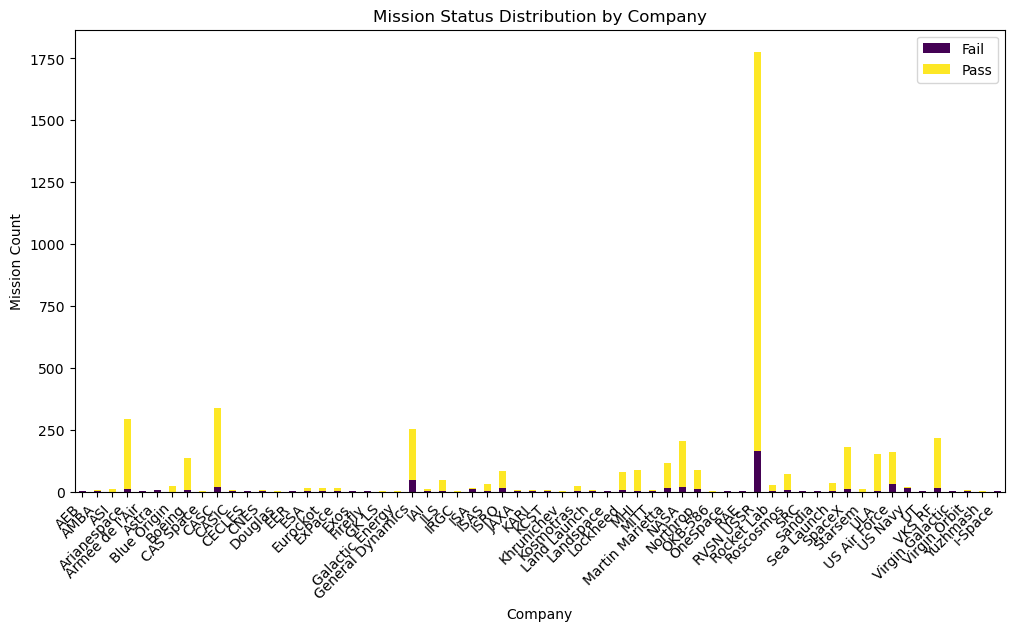

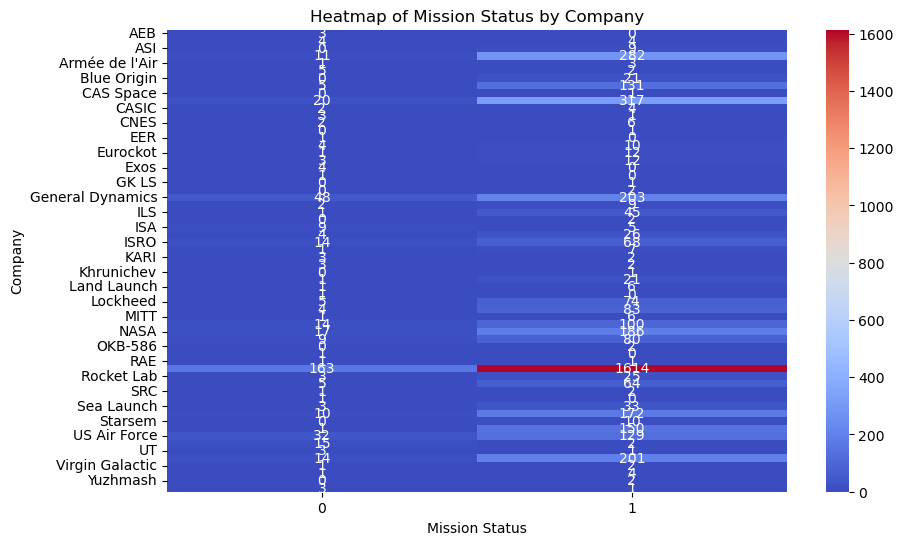

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data to create contingency table
contingency_table = df.groupby('Company')['MissionStatus'].value_counts().unstack(fill_value=0)

# Plot 1: Stacked Bar Chart
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel("Company")
plt.ylabel("Mission Count")
plt.title("Mission Status Distribution by Company")
plt.legend(["Fail", "Pass"])
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot 2: Heatmap of Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Mission Status")
plt.ylabel("Company")
plt.title("Heatmap of Mission Status by Company")
plt.show()

## Hypothesis Testing 

## Null Hypothesis (H₀): There is no relationship between the company and the mission outcome (Pass/Fail).

## Alternative Hypothesis (H₁): There is a relationship between the company and the mission outcome (Pass/Fail).

In [33]:
import pandas as pd
import scipy.stats as stats

# Creating contingency table (each row represents a company)
contingency_table = df.groupby('Company')['MissionStatus'].value_counts().unstack(fill_value=0)


# Performing Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print()


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Statistic: 525.4361132628128
P-Value: 4.427463281913726e-75
Reject the null hypothesis: There is a significant relationship between Company and Mission Status.


In [35]:
print(contingency_table)

MissionStatus     0    1
Company                 
AEB               3    0
AMBA              4    4
ASI               0    9
Arianespace      11  282
Armée de l'Air    1    3
...              ..  ...
VKS RF           14  201
Virgin Galactic   1    2
Virgin Orbit      1    4
Yuzhmash          0    2
i-Space           3    1

[62 rows x 2 columns]


In [36]:
print(expected)

[[3.02204929e-01 2.69779507e+00]
 [8.05879810e-01 7.19412019e+00]
 [9.06614786e-01 8.09338521e+00]
 [2.95153480e+01 2.63484652e+02]
 [4.02939905e-01 3.59706010e+00]
 [7.05144834e-01 6.29485517e+00]
 [2.11543450e+00 1.88845655e+01]
 [1.36999568e+01 1.22300043e+02]
 [1.00734976e-01 8.99265024e-01]
 [3.39476870e+01 3.03052313e+02]
 [6.04409857e-01 5.39559014e+00]
 [4.02939905e-01 3.59706010e+00]
 [8.05879810e-01 7.19412019e+00]
 [1.00734976e-01 8.99265024e-01]
 [1.00734976e-01 8.99265024e-01]
 [1.41028967e+00 1.25897103e+01]
 [1.30955469e+00 1.16904453e+01]
 [1.51102464e+00 1.34889754e+01]
 [4.02939905e-01 3.59706010e+00]
 [1.00734976e-01 8.99265024e-01]
 [1.00734976e-01 8.99265024e-01]
 [2.01469952e-01 1.79853005e+00]
 [2.52844790e+01 2.25715521e+02]
 [1.10808474e+00 9.89191526e+00]
 [4.63380891e+00 4.13661911e+01]
 [2.01469952e-01 1.79853005e+00]
 [1.41028967e+00 1.25897103e+01]
 [3.02204929e+00 2.69779507e+01]
 [8.26026805e+00 7.37397319e+01]
 [8.05879810e-01 7.19412019e+00]
 [5.036748

In [37]:
print(dof)

61


In [38]:
print(chi2)

525.4361132628128


## Result 

In [39]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Company and Mission Status.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")

Reject the null hypothesis: There is a significant relationship between Company and Mission Status.
